In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

#-----------------------------------------------------------------------

 #select random points
def init_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)
   
    for i in range(k):
        
        centroids[i,:] = X[idx[i],:]
   
    return centroids


# centroid function
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
   
   
    for i in range(m):
        min_dist = 1000000#suppose  min_dist =1000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
   
    return idx
# centroid maker(deplecment centriod"select new cetriod")
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
   
    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
   
    return centroids

# k means function
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
   
    for i in range(max_iters):
        #select
        idx = find_closest_centroids(X, centroids)
        #deplecment
        centroids = compute_centroids(X, idx, k)
   
    return idx, centroids


In [24]:
#load data

data = loadmat('C:\\machine learning\\data\\unsupervised\\ex7data2.mat')
print(data['X'].shape)


(300, 2)


In [17]:
#classify points 
X = data['X']
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
# initial_centroids = np.array([[8, 0], [8, 6], [0, 3]])
# initial_centroids =  init_centroids(X, 3)#random centroids
print(initial_centroids )


[[3 3]
 [6 2]
 [8 5]]


In [18]:
idx = find_closest_centroids(X, initial_centroids)
print(idx)


[0. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1.
 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 0.]


In [19]:
#calculate new centroid
c = compute_centroids(X, idx, 3)
print(c)


[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


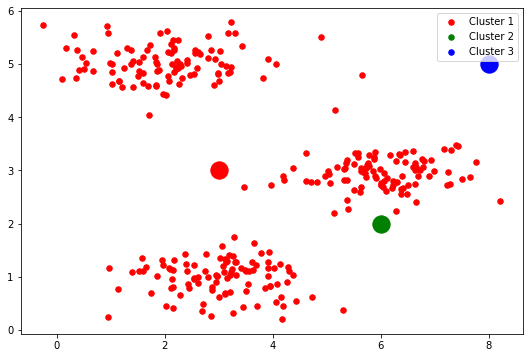

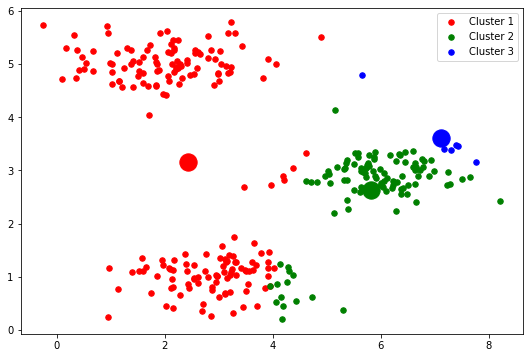

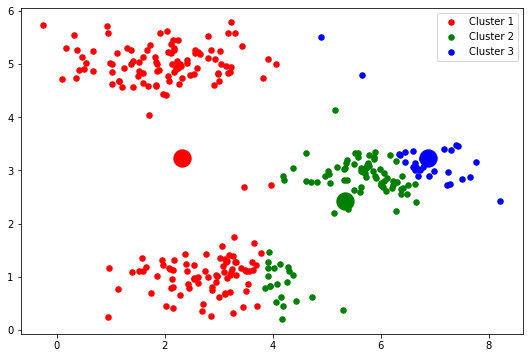

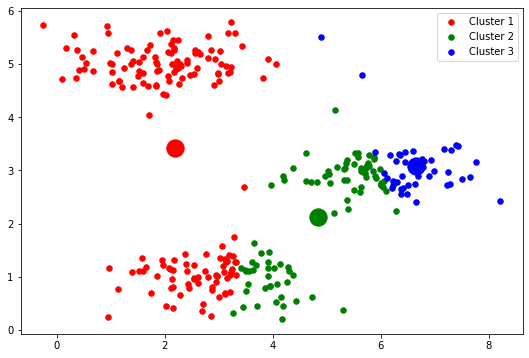

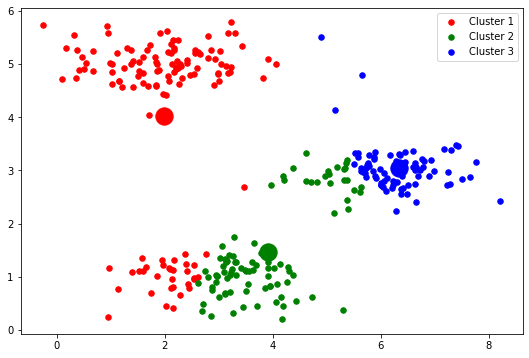

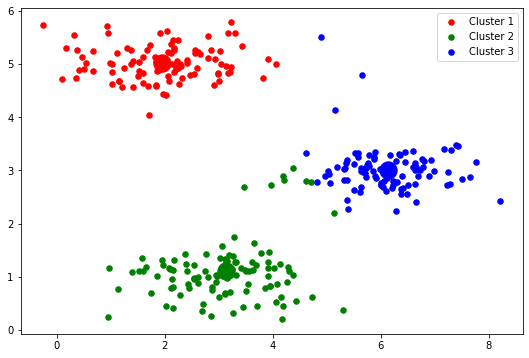

In [21]:
for x in range(6):
    #apply k means 
    idx, centroids = run_k_means(X, initial_centroids, x)
    #print(idx)
    print()
    #print(centroids )
   
   
   # draw it
    cluster1 = X[np.where(idx == 0)[0],:]
    cluster2 = X[np.where(idx == 1)[0],:]
    cluster3 = X[np.where(idx == 2)[0],:]
   
    fig, ax = plt.subplots(figsize=(9,6))
    ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
    ax.scatter(centroids[0,0],centroids[0,1],s=300, color='r')
   
    ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
    ax.scatter(centroids[1,0],centroids[1,1],s=300, color='g')
   
    ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
    ax.scatter(centroids[2,0],centroids[2,1],s=300, color='b')
   
    ax.legend()

